# **Linear Regression on Fish Data**

The following data-set contains the number of fish groups of camper caught in a state park (taken from https://stats.idre.ucla.edu/r/dae/zip/). Your task here is to predict the number of fish caught by a fishing party from the following information:

*   How many people are in the group

*   the number children in the group

*   the use of live bait

*   whether the group came with a camper to the park.

We have a small data set, of 250 groups, which visited a state park and provided. For comparison the data set is already split into a training set and testset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, log_loss
from scipy.stats import norm
import tensorflow as tf
import sys
%matplotlib inline

In [ ]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/ 
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')
Xtrain = d['Xt'] #"livebait","camper","persons","child"
Xtest = d['Xte']
ytrain = d['yt']
ytest = d['yte']
pd.DataFrame(Xtrain[0:5])

Downloading


,0,1,2,3
0,1.0,0.0,4.0,0.0
1,1.0,1.0,2.0,0.0
2,1.0,1.0,3.0,0.0
3,1.0,1.0,3.0,2.0
4,1.0,1.0,4.0,1.0


In [ ]:
y_hat_begin = Xtest

In [ ]:
# Add intercept
intercept_train = np.ones((len(Xtrain),1))
intercept_test = np.ones((len(Xtest),1))

Xtrain = np.append(intercept_train, Xtrain, axis=1)
Xtest = np.append(intercept_test, Xtest, axis=1)

a) Do a linear regression by creating a design matrix with the intercept term and use the fomulae given in the lecture to determine the coefficients on the training set.

In [ ]:
XTX = np.matmul(Xtrain.T,Xtrain)
XTXI = np.linalg.inv(XTX)
XTXIXT = np.matmul(XTXI, Xtrain.T)
w = np.matmul(XTXIXT,ytrain)
w

array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])

b) Repeat a) but this time with LinearRegression from sklearn.linear_model

Result: array([-8.49222821, 2.4822138 , 2.95430727, 4.64953914, -5.47160051]) Don't forget the intercept, you should have 5 numbers!

In [ ]:
reg = LinearRegression(fit_intercept=False).fit(Xtrain, ytrain)
reg.coef_

array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])

In [ ]:
inter=reg.coef_[0]
weights = reg.coef_[1:]
y_hat=inter+ np.sum(weights.T * y_hat_begin, axis=1)
y_hat

array([ 5.45638921,  2.46700249, 10.10592835,  3.28906387, -1.36047527,
       -2.18253664,  5.42130976,  2.46700249,  1.593832  ,  6.24337113,
       -2.18253664,  1.64494112,  6.24337113,  6.24337113, -3.00459802,
       -2.18253664,  3.76115733,  1.593832  , -1.36047527, 10.89291027,
        0.77177062,  2.46700249, -3.00459802,  1.593832  ,  6.24337113,
        1.593832  , -0.8883818 ,  7.11654163, -1.36047527, -2.18253664,
        3.28906387, 10.0708489 ,  0.77177062,  1.64494112,  6.24337113,
        6.24337113,  0.77177062, -1.36047527, 10.89291027, 15.54244941,
        2.93909596,  1.64494112, 10.0708489 , 10.0708489 ,  0.77177062,
        7.11654163, 15.54244941,  0.77177062,  3.28906387,  5.42130976])

c) Determine the Root Mean Square Error (RMSE) and the average negative log-likelihood (NLL) on the testset. For NLL we assume that the conditional probability distrubution (CPD) $p(y|x)$ is given by the density of a Gaussian with constant variance $\sigma^2$. Estimate $\sigma^2$ using the variance of the residuals. Use the variance estimation with $1/N$.

Result: $ RMSE \approx 8.58812$, $\hat \sigma^2 \approx 73.7559$, $\tt{NLL} \approx 3.569$

In [ ]:
prediction = reg.predict(Xtest)
pd.DataFrame(prediction[0:5])

,0
0,5.456389
1,2.467002
2,10.105928
3,3.289064
4,-1.360475


In [ ]:
pd.DataFrame(ytrain[0:5])

,0
0,6.0
1,1.0
2,6.0
3,1.0
4,3.0


In [ ]:
error = np.square((ytest.flatten() - prediction.flatten()))
MSE = np.mean(error)
RMSE = np.sqrt(MSE)
RMSE

8.588126386734233

In [ ]:
estim_var = np.var((ytest-prediction))
estim_var
sd = np.sqrt(estim_var)
sd

8.572065305350753

In [ ]:
nll = (-np.sum(stats.norm.logpdf(ytest, loc=prediction, scale=sd) ))/ytest.shape
nll

array([3.56932264])

d) For the testset: plot the predicted mean number of fish caught ( μ ) against observed number of fish caught. Further include the 2.5 and 97.5 precentile of p(y|x), the conditional predictive distribution (CPD) of  y  for a given  x . Why is a Gaussian not ideal for that kind of data?

Hint: For the Gaussian the 2.5% and the 97.5% percentile is approximatiy given by  μ±1.96∗σ

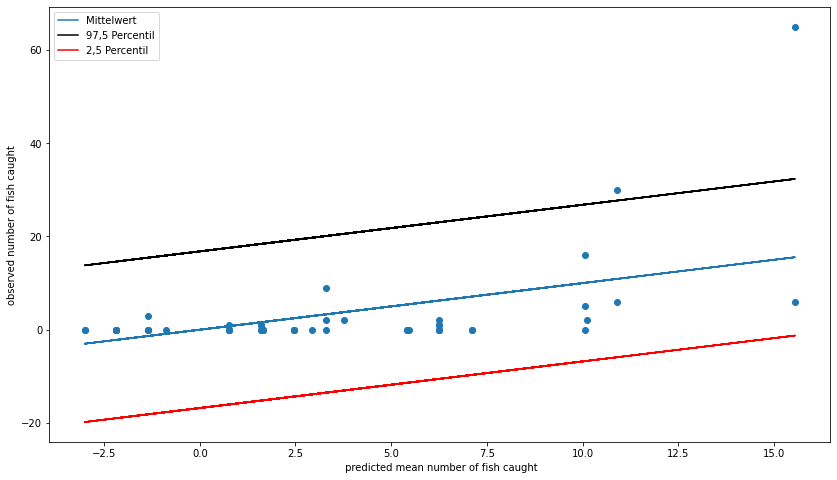

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(x=prediction, y=ytest)              # blaue Punkte: unsere Prediction gegen die tatsächlich gefangenen Fische
plt.plot(prediction, prediction, label='Mittelwert')                # quasi unsere lineare Regression
plt.plot(prediction, prediction+1.96*sd, c = 'black', label='97,5 Percentil')
plt.plot(prediction, prediction-1.96*sd, c='red', label='2,5 Percentil')

plt.xlabel(' predicted mean number of fish caught')
plt.ylabel('observed number of fish caught')
plt.legend()

e) This data is count data. Count data has only positive values and also the distribution is discrete. You cannot catch 0.5 fish and that the CPD has probability density > 0 on negative number of fish is wrong too. A Gaussian as a CPD is therefore not ideal.

Now use a Poissonian as CPD. If we assume a Poissonian then the probability to catch $k$ fish is given by$$
  p(k) = \exp(-\mu) \frac{\mu^k}{k!}
$$

and the NLL is thus by:

$$
 log(p(k)) = -\mu  + k \cdot \log(\mu) - log(k!)
$$
with $\mu$ being the expectation. In our case the average number of fish expected.

In the case of the probabilistic interpretation of the linear regression, $y_i$ for a given $x_i$ is distributed like a Gaussian. The paramter $\mu_i$ from $N(\mu_i,\sigma^2)$ has been determined from $x_i$ via $\mu_i= \beta^T \cdot x_i$ by minimizing the NLL.

A small additional detail: For the Poissonian case, $\mu_i$ needs to be positive. We therefore do not use $\beta^T \cdot x_i$ directly but "pipe it through" an exponential first to make it positive and thus link $\mu_i=exp(\beta^T \cdot x_i)$ to the data.

Use a gradient descent approach on the NLL to find the solution for the parameters. Calculate the RMSE and the NLL on the test set and compare with c).

Hint: On the trainingset for the parameter values (1,1,1,1,1) the NLL should be approx 1508 and the gradient (1518.61, 1403.99, 1171.02, 5701.91, 3258.7). For the NLL a good learning rate would be 0.001 and training should be done for at least 5000 epochs.

In [ ]:
lange Formel
ableiten -> 4 Ableitungen, die aber alle gleich aussehen
-X*exp(b*X) + k*X       immer für ein beta und den dazugehörigen Xen

beta 1 :     log(p(k))/beta = ... hier Startwert für beta 1
beta 2 :     log(p(k))/beta = ... hier Startwert für beta 2
beta 3 :     log(p(k))/beta = ... hier Startwert für beta 3
beta 4 :     log(p(k))/beta = ... hier Startwert für beta 4
Hier bekommen wir Gradienten raus               (1518.61, 1403.99, 1171.02, 5701.91, 3258.7)
Diesen Gradienten - Lernrate*Ableitung
Lernrate??
https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

SyntaxError: ignored

In [ ]:
#beta = reg.coef_
beta = np.ones(5)

In [ ]:
def grad_nll(beta, X, y):
  
  mü = np.exp(np.matmul(X, beta ))
  nll = np.zeros_like(X)

  for i in range(X.shape[0]):
    #cost = sum(sum(np.asarray(-X.T.dot(np.exp(X.dot(beta.T))) + prediction.T.dot(X))))  #nll für poisson Verteilung

    mx = X[i] * mü[i]
    nll[i] = -mx + y[i] * X[i]

  return np.mean(nll, axis = 0)

#np.round(grad_nll(beta, Xtrain, ytrain))

In [ ]:
def gradient_descent(X, y, beta, learning_rate = 0.001, iterations = 5000):
  
  m = len(y)

  cost_history = np.zeros(iterations)
  beta_history = np.zeros((iterations,5), dtype=float)

  for it in range(iterations+1):
  
    grad_loss = grad_nll(beta, X, y)
    beta = beta + learning_rate*grad_loss

    #beta_history[it,:] = beta
    #cost_history[it] = grad_loss 

    if (it % 500 == 0):
      print('{}: grad_loss = {}, weights = {}'.format(it, grad_loss, beta))

  return beta

In [ ]:
new_beta = gradient_descent(Xtrain, ytrain, beta, 0.001, 10000)
print('new betas = {}'.format(new_beta))

0: grad_loss = [-1518.61304305 -1403.99474131 -1171.02247951 -5701.91224653
 -3258.70389229], weights = [-0.51861304 -0.40399474 -0.17102248 -4.70191225 -2.25870389]
500: grad_loss = [-1.1344812  -0.93175201 -0.80048795  1.59670564  0.25201262], weights = [ 0.67378559  0.7807983   0.78153486  0.06582337 -1.98036082]
1000: grad_loss = [-0.71958836 -0.44964899 -0.29153156  0.43467578  0.15826758], weights = [ 0.20103436  0.43027239  0.51153782  0.43284587 -1.88421336]
1500: grad_loss = [-0.50107476 -0.20726986 -0.07799841  0.22589558  0.11441744], weights = [-0.09693099  0.27422491  0.42779888  0.58951896 -1.8167632 ]
2000: grad_loss = [-0.39012827 -0.08990098  0.005933    0.13690369  0.08360057], weights = [-0.31705625  0.20313492  0.41294665  0.67748088 -1.76770182]
2500: grad_loss = [-0.3230229  -0.02586698  0.03928943  0.09128845  0.06145428], weights = [-0.49409277  0.17572814  0.42558981  0.73336462 -1.73175156]
3000: grad_loss = [-0.27767662  0.01129965  0.05067038  0.06530718  0.

f) Do the same plot as in d) but this time with a Poisson CPD. Hint you can use scipy.stats.poisson to calculate the percentiles.

In [ ]:
y_pred = np.exp(np.matmul(Xtest, new_beta))
y_pred= np.sort(y_pred)
print(y_pred)

perc1 = stats.poisson.ppf(0.025, y_pred)
perc2 = stats.poisson.ppf(0.975, y_pred)

print('2,5% Percentil = {}'.format(perc1))
print('97,5% Percentil = {}'.format(perc2))
#print(perc1)
#print(perc2)

[ 0.1981065   0.1981065   0.39418905  0.39418905  0.39418905  0.39418905
  0.50321363  0.50321363  0.50321363  0.76338397  0.76338397  0.76338397
  0.76338397  0.76338397  0.78435086  0.78435086  0.78435086  0.78435086
  0.86326838  1.00128617  1.00128617  1.00128617  1.10203066  1.51896883
  1.51896883  1.51896883  1.51896883  1.93908437  1.93908437  1.9923427
  1.9923427   1.9923427   2.19280241  2.54338372  2.54338372  2.87617086
  3.85835806  3.85835806  3.85835806  3.85835806  3.85835806  3.85835806
  4.92550056  4.92550056  4.92550056  7.30580958  9.80067969  9.80067969
 24.89487001 24.89487001]
2,5% Percentil = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  3.  4.  4. 16. 16.]
97,5% Percentil = [ 1.  1.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  6.  6.  7.
  8.  

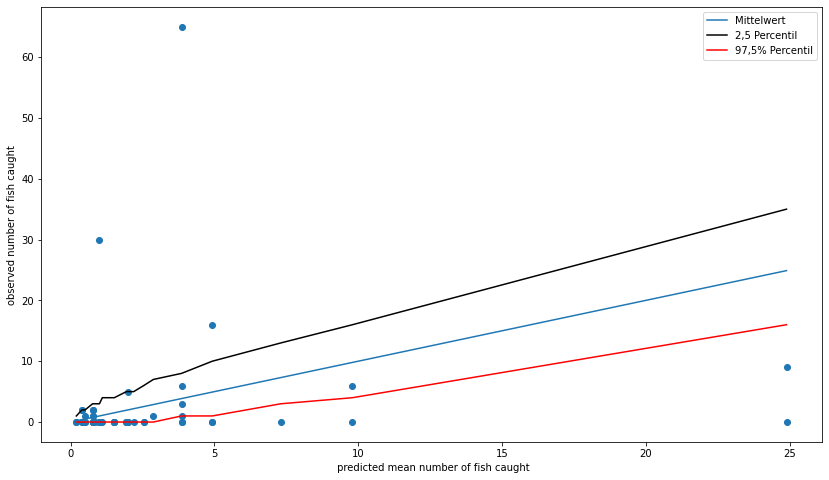

In [ ]:

plt.figure(figsize=(14,8))
plt.scatter(x=y_pred, y=ytest)              # blaue Punkte: unsere Prediction gegen die tatsächlich gefangenen Fische
plt.plot(y_pred, y_pred, label='Mittelwert')                    # quasi unsere lineare Regression
plt.plot(y_pred, perc2, c = 'black', label='2,5 Percentil')
plt.plot(y_pred, perc1, c='red', label='97,5% Percentil')

plt.xlabel(' predicted mean number of fish caught')
plt.ylabel('observed number of fish caught')
plt.legend()